Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


이미지 파일 경로: C:\Users\user\OneDrive\Desktop\OCR_mini\보험_확인서\원천\IMG_OCR_6_F_0000311.png


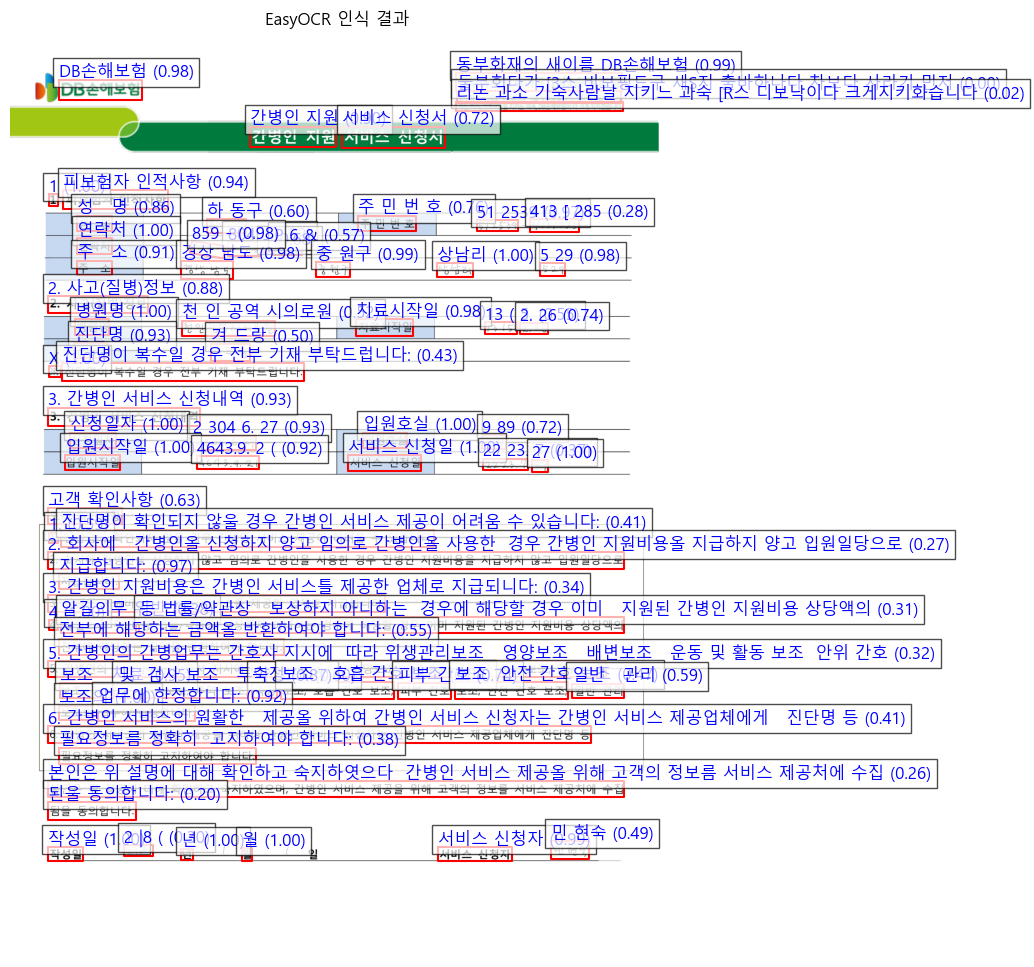

텍스트 1: 동부화재의 새이름 DB손해보험, 신뢰도: 0.9887
텍스트 2: DB손해보험, 신뢰도: 0.9840
텍스트 3: 둘부회다가 [3스 비보핑드구 새S지 출바하나다 차보다 사라기 민저, 신뢰도: 0.0047
텍스트 4: 리논 과소 기숙사람날 지키느 과숙 [R스 디보낙이다 크게지키화습니다, 신뢰도: 0.0225
텍스트 5: 간병인 지원, 신뢰도: 0.9024
텍스트 6: 서비스 신청서, 신뢰도: 0.7246
텍스트 7: 1, 신뢰도: 1.0000
텍스트 8: 피보험자 인적사항, 신뢰도: 0.9442
텍스트 9: 성   명, 신뢰도: 0.8602
텍스트 10: 하 동구, 신뢰도: 0.5994
텍스트 11: 주 민 번 호, 신뢰도: 0.7610
텍스트 12: 51 2539, 신뢰도: 0.9704
텍스트 13: 413 [ 285, 신뢰도: 0.2817
텍스트 14: 연락처, 신뢰도: 0.9952
텍스트 15: 8043, 신뢰도: 0.5196
텍스트 16: -, 신뢰도: 0.6783
텍스트 17: P 6 &, 신뢰도: 0.5673
텍스트 18: 주   소, 신뢰도: 0.9080
텍스트 19: 경상 남도, 신뢰도: 0.9784
텍스트 20: 중 원구, 신뢰도: 0.9905
텍스트 21: 상남리, 신뢰도: 0.9971
텍스트 22: 5 29, 신뢰도: 0.9824
텍스트 23: 2. 사고(질병)정보, 신뢰도: 0.8751
텍스트 24: 병원명, 신뢰도: 0.9996
텍스트 25: 천 인 공역 시의로원, 신뢰도: 0.5231
텍스트 26: 치료시작일, 신뢰도: 0.9843
텍스트 27: 13 ( 5., 신뢰도: 0.5519
텍스트 28: 2. 26, 신뢰도: 0.7379
텍스트 29: 진단명, 신뢰도: 0.9289
텍스트 30: 겨 드랑, 신뢰도: 0.5011
텍스트 31: X, 신뢰도: 0.9966
텍스트 32: 진단명이 복수일 경우 전부 기재 부탁드럽니다:, 신뢰도: 0.4336
텍스트 33: 3. 간병인 서비스 신청내역, 신뢰도: 0.9330
텍스트 34: 신

In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# EasyOCR 리더 초기화 (영어, 한국어 인식)
reader = easyocr.Reader(['ko', 'en'])  # GPU 사용 시 gpu=True 추가

# 이미지 폴더 경로
image_folder = 'C:\\Users\\user\\OneDrive\\Desktop\\OCR_mini\\보험_확인서\\원천'

# 폴더 내 이미지 파일 찾기
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.tiff'))]

if not image_files:
    print(f"오류: 지정된 폴더에 이미지 파일이 없습니다: {image_folder}")
else:
    # 첫 번째 이미지 파일 사용
    image_path = os.path.join(image_folder, image_files[0])
    print(f"이미지 파일 경로: {image_path}")
    
    # 이미지 로드
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"오류: 이미지를 불러올 수 없습니다: {image_path}")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # 텍스트 인식 실행
        results = reader.readtext(image_rgb)
        
        # 결과 시각화
        plt.figure(figsize=(12, 12))
        plt.imshow(image_rgb)
        
        for (bbox, text, prob) in results:
            # 바운딩 박스 좌표 추출
            (top_left, top_right, bottom_right, bottom_left) = bbox
            
            # 사각형 그리기
            x_coords = [p[0] for p in [top_left, top_right, bottom_right, bottom_left, top_left]]
            y_coords = [p[1] for p in [top_left, top_right, bottom_right, bottom_left, top_left]]
            plt.plot(x_coords, y_coords, 'r-')
            
            # 텍스트와 신뢰도 표시
            plt.text(top_left[0], top_left[1] - 10, f"{text} ({prob:.2f})", 
                    color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
        
        plt.title("EasyOCR 인식 결과")
        plt.axis('off')
        plt.show()
        
        # 인식 결과 출력
        for i, (bbox, text, prob) in enumerate(results):
            print(f"텍스트 {i+1}: {text}, 신뢰도: {prob:.4f}")


이지오씨알 cpu로 돌린 결과 

In [1]:
import easyocr
import os
import json
from PIL import Image
import numpy as np
import re
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 경로 설정
label_path = r"C:\\Users\\user\\OneDrive\\Desktop\\OCR_mini\\보험_확인서\\라벨"
image_path = r"C:\\Users\\user\\OneDrive\\Desktop\\OCR_mini\\보험_확인서\\원천"
results_path = r"C:\\Users\\user\\OneDrive\\Desktop\\OCR_mini\\결과"

# 결과 디렉토리 생성
os.makedirs(results_path, exist_ok=True)

# EasyOCR 리더 초기화
reader = easyocr.Reader(['ko'])  # 한국어 설정

def process_image(image_file):
    """이미지 파일을 처리하여 OCR 결과를 반환합니다."""
    try:
        image_file_path = os.path.join(image_path, image_file)
        image = Image.open(image_file_path)
        # PIL Image를 numpy 배열로 변환
        image_np = np.array(image)
        result = reader.readtext(image_np)
        return result
    except Exception as e:
        print(f"이미지 처리 중 오류 발생: {e}")
        return []

def clean_filename(filename):
    """파일명에서 'F ' 접두사를 제거합니다."""
    if filename.startswith('F '):
        return filename[2:]
    return filename

def find_matching_image(identifier):
    """식별자와 일치하는 이미지 파일을 찾습니다."""
    for img_file in os.listdir(image_path):
        # 파일명에서 'F ' 접두사를 제거하고 비교
        clean_img_file = clean_filename(img_file)
        # 식별자가 파일명에 포함되어 있는지 확인
        if identifier in clean_img_file:
            return img_file
    return None

# 디렉토리 존재 여부 확인
if not os.path.exists(label_path):
    print(f"라벨 디렉토리가 존재하지 않습니다: {label_path}")
    exit()

if not os.path.exists(image_path):
    print(f"이미지 디렉토리가 존재하지 않습니다: {image_path}")
    exit()

print(f"라벨 디렉토리 내 파일 목록: {os.listdir(label_path)}")
print(f"이미지 디렉토리 내 파일 목록: {os.listdir(image_path)}")

# 결과 저장을 위한 딕셔너리
all_results = {}

# JSON 파일 처리
for json_file in os.listdir(label_path):
    if json_file.endswith('.json'):
        json_file_path = os.path.join(label_path, json_file)
        print(f"\n처리 중인 JSON 파일: {json_file}")
        
        try:
            with open(json_file_path, 'r', encoding='utf-8') as f:
                label_data = json.load(f)
            
            # 이미지 파일명 생성
            image_identifier = label_data['Images']['identifier']
            image_type = label_data['Images']['type'].lower()
            image_file = f"{image_identifier}.{image_type}"
            image_file_path = os.path.join(image_path, image_file)
            
            print(f"찾는 이미지 파일: {image_file}")
            
            # 이미지 파일 존재 여부 확인
            if os.path.exists(image_file_path):
                print(f"이미지 파일을 찾았습니다: {image_file}")
                ocr_result = process_image(image_file)
                used_image = image_file
            else:
                # 이미지 파일이 없는 경우 대체 이미지 찾기
                print(f"파일이 존재하지 않습니다: {image_file_path}")
                print(f"다른 이미지 파일 찾는 중...")
                
                # 파일명에 identifier가 포함된 이미지 찾기
                matching_image = find_matching_image(image_identifier)
                
                if matching_image:
                    print(f"대체 이미지를 찾았습니다: {matching_image}")
                    ocr_result = process_image(matching_image)
                    used_image = matching_image
                else:
                    print(f"JSON 파일: {json_file}에서 참조하는 이미지를 찾을 수 없습니다.")
                    continue
            
            # OCR 결과와 라벨 데이터 비교 및 처리
            match_count = 0
            match_results = []
            
            for bbox in label_data['bbox']:
                bbox_text = bbox['data']
                bbox_id = bbox.get('id', 'unknown')
                found = False
                best_match = ""
                
                for ocr_box in ocr_result:
                    ocr_text = ocr_box[1]  # OCR 결과 텍스트
                    
                    if bbox_text in ocr_text or ocr_text in bbox_text:
                        print(f"일치: ID {bbox_id} - {bbox_text}")
                        match_count += 1
                        found = True
                        best_match = ocr_text
                        break
                
                if not found:
                    print(f"불일치: ID {bbox_id} - {bbox_text}")
                
                # 결과 저장
                match_results.append({
                    "id": bbox_id,
                    "label_text": bbox_text,
                    "matched": found,
                    "ocr_text": best_match if found else ""
                })
            
            print(f"총 {len(label_data['bbox'])}개 중 {match_count}개 일치")
            
            # 결과 저장
            all_results[json_file] = {
                "image_file": used_image,
                "total_labels": len(label_data['bbox']),
                "matched_count": match_count,
                "match_rate": round(match_count / len(label_data['bbox']) * 100, 2) if len(label_data['bbox']) > 0 else 0,
                "details": match_results
            }
        
        except Exception as e:
            print(f"오류 발생: {e}")
            import traceback
            traceback.print_exc()

# 결과를 JSON 파일로 저장
results_file = os.path.join(results_path, "ocr_results.json")
with open(results_file, "w", encoding="utf-8") as f:
    json.dump(all_results, f, ensure_ascii=False, indent=2)

print(f"\n결과가 저장되었습니다: {results_file}")

# 요약 결과 출력
print("\n===== OCR 결과 요약 =====")
total_labels = 0
total_matches = 0

for json_file, result in all_results.items():
    total_labels += result["total_labels"]
    total_matches += result["matched_count"]
    print(f"{json_file}: {result['matched_count']}/{result['total_labels']} 일치 ({result['match_rate']}%)")

if total_labels > 0:
    overall_match_rate = round(total_matches / total_labels * 100, 2)
    print(f"\n전체 일치율: {total_matches}/{total_labels} ({overall_match_rate}%)")


c:\ProgramData\anaconda3\envs\ocr_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 